##### duration: ~1/4 to 1/2 real time

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


### Get recording info (google sheets)

In [21]:
import requests
import pandas as pd
from io import BytesIO

In [22]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [23]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,calibration_board_shape,calibration_square_size,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,NaN,NaN,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150


### Run

In [24]:
for idx, recording_row in recording_df.iterrows():
    break

In [25]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [26]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [27]:
output_directory_sizenorm = output_directory / 'size_normalization' / recording_row.video_recording_id
output_directory_sizenorm.mkdir(parents=True, exist_ok=True)

In [28]:
from multicamera_airflow_pipeline.tim_240731.keypoints.size_norm import SizeNormalizer 

In [29]:
!ls {output_directory}

2D_predictions	    camera_sync  openephys_sync      spikesorting
camera_calibration  gimbal	 size_normalization  triangulation


In [30]:
!ls { output_directory / 'gimbal' / recording_row.video_recording_id}

completed.log			gimbal_success.bool.90009x1.mmap
fit_likelihood.jpg		joint_directions.jpg
gimbal.float32.90009x25x3.mmap	keypoints_order_gimbal.npy
gimbal_params.p			skeleton_distances.jpg


In [31]:
predictions_3d_file = list(
    (output_directory / "gimbal" / recording_row.video_recording_id).glob(
        "gimbal.*.mmap"
    )
)[0]

In [34]:
size_normalizer = SizeNormalizer(
    predictions_3d_file = predictions_3d_file,
    size_norm_output_directory = output_directory_sizenorm,
)

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.size_norm:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


calculating joint lengths:   0%|          | 0/26 [00:00<?, ?it/s]

calculating angles:   0%|          | 0/90009 [00:00<?, ?it/s]

computing new keypoint positions:   0%|          | 0/26 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/90009 [00:00<?, ?it/s]

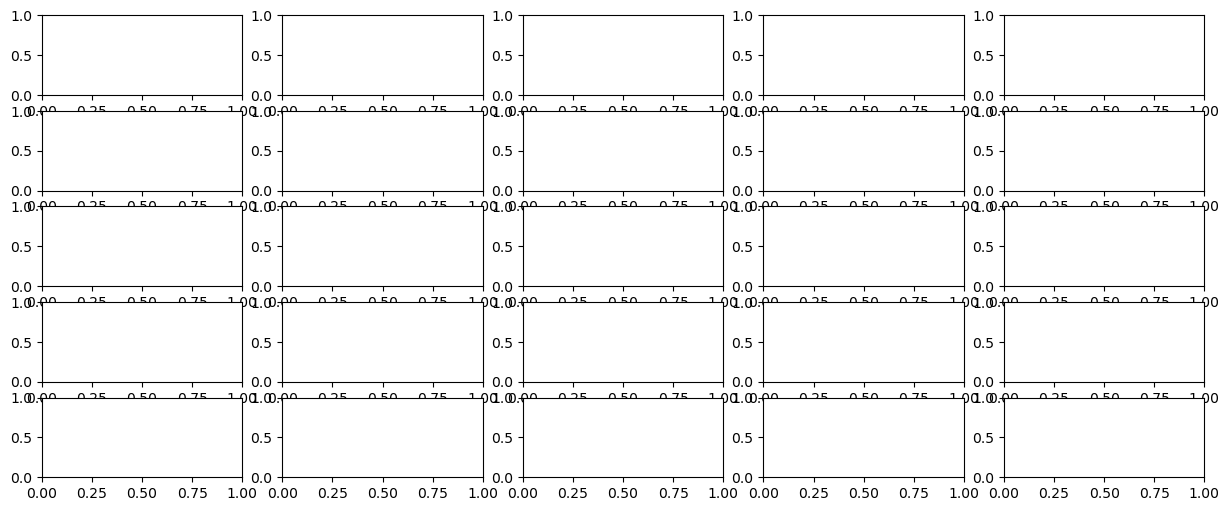

In [35]:
size_normalizer.run()

In [38]:
!ls {output_directory_sizenorm}

size_norm_angles.float32.90009x25x3.mmap  size_norm.float32.90009x25x3.mmap


In [37]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt